# Normal Distributions Lab

### Introduction 

In this lesson, we'll work with the normal distribution to see how the number of years a player drafted in the first round is likely to play in the NBA.

Let's load up our data.

In [4]:
import pandas as pd
url = "https://raw.githubusercontent.com/the-pudding/data/master/hype/players.csv"
df = pd.read_csv(url)

In [5]:
df[:3]

,name,link,rank,draft_year,draft_rd,draft_pk,college,recruit_year,bbrID,pick_overall,...,nba_mean_ws48_rank,nba_mean_vorp_rank,nba_mean_pipm_rank,nba_mean_wa_rank,top_mean_ws48_rank,top_mean_vorp_rank,top_mean_pipm_rank,top_mean_wa_rank,total_seasons,valid_seasons
0,Al Harrington,/players/h/harrial01.html,1.0,1998.0,1.0,25.0,NaN,1998.0,harrial01,25.0,...,134.363636,129.727273,122.181818,118.727273,109.6,114.0,86.8,79.8,16.0,11.0
1,Rashard Lewis,/players/l/lewisra02.html,2.0,1998.0,2.0,32.0,NaN,1998.0,lewisra02,32.0,...,55.916667,44.416667,56.083333,55.166667,32.4,21.8,19.4,18.2,16.0,12.0
2,Korleone Young,/players/y/youngko01.html,3.0,1998.0,2.0,40.0,NaN,1998.0,youngko01,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [38]:
first_round_df = df[df['draft_pk'] <= 5]

In [39]:
first_round_df.shape

(56, 30)

In [40]:
total_seasons = first_round_df['total_seasons']

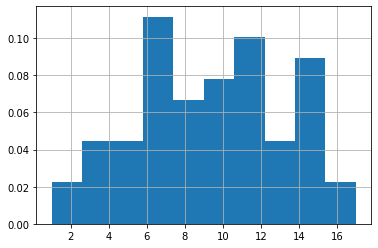

In [41]:
total_seasons.hist(density = True)

Now let's use assume that the total number of seasons is normally distributed, with a mean equal and standard deviation equal to that in our dataset.

In [43]:
total_seasons.mean()

9.303571428571429

In [45]:
total_seasons.std()

3.8890038119485886

> For this lab, we'll assume that the standard deviation in our dataset is the standard deviation of the population.  And we'll round our standard deviation to 4.

<img src="pdf-normal.png" width="50%">

Ok, so we have a normal distribution with the following parameters:
* $\mu = 9$ seasons and 
* $\sigma = 4$  seasons.  

Now answer the following questions (without using the scipy stats library).  

> The answers are provided at the end of this lab.

> What is the z-score of a player drafted in the top five that plays fewer than one season.

In [48]:
(1 - 9)/4

-2.0

What is the probability that a player drafted in the top 5, plays fewer than 1 season?

In [ ]:
.025

What is the probability that a player drafted in the top 5, plays more than 13 seasons?

In [ ]:
.16

What is the probability that a player drafted in the top 5, plays between 5 and 13 seasons?

In [49]:
.68

0.68

### Answers using scipy stats below

Now answer the same questions with the scipy.stats library.  We'll initialize the normal distribution for you.  You do the rest.

In [56]:
from scipy.stats import norm

In [57]:
player_seasons_norm = norm(9, 4)

What is the probability that a player drafted in the top 5, plays fewer than 1 season?

In [52]:

# 0.0227501

0.022750131948179195

What is the probability that a player drafted in the top 5, plays more than 13 seasons?

In [54]:
1 - player_seasons_norm.cdf(13)
# 0.15865

0.15865525393145707

What is the probability that a player drafted in the top 5, plays between 5 and 13 seasons?

In [55]:
player_seasons_norm.cdf(13) - player_seasons_norm.cdf(5)

# 0.682689

0.6826894921370859

Finally, we can check this against the percentages from our data with the following.

In [61]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
e_seasons = ECDF(total_seasons)

In [62]:
e_seasons(1) # compare with .022

0.017857142857142856

In [63]:
1 - e_seasons(13) # compare with .158

0.1785714285714286

In [64]:
e_seasons(13) - e_seasons(5) # compare with .682

0.6428571428571428

### Solutions

In [48]:
(1 - 9)/4

-2.0

What is the probability that a player drafted in the top 5, plays fewer than 1 season?

In [ ]:
.025

What is the probability that a player drafted in the top 5, plays more than 13 seasons?

In [ ]:
.16

What is the probability that a player drafted in the top 5, plays between 5 and 13 seasons?

In [49]:
.68

0.68

What is the probability that a player drafted in the top 5, plays fewer than 1 season?

In [52]:

# 0.0227501

0.022750131948179195

What is the probability that a player drafted in the top 5, plays more than 13 seasons?

In [54]:
1 - player_seasons_norm.cdf(13)
# 0.15865

0.15865525393145707

What is the probability that a player drafted in the top 5, plays between 5 and 13 seasons?

In [55]:
player_seasons_norm.cdf(13) - player_seasons_norm.cdf(5)

# 0.682689

0.6826894921370859